In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

import colormaps as cmaps # for scientific colormaps

from matplotlib import pyplot as plt
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Figure 1. Toy model Pareto front
## B. Pareto front for E. coli core toy model optimization
* Plots the growth rate on x-axis against medium cost on the y-axis for each candidate medium.
* Each dot is colour-coded according to the batch it resulted from.
* Plots Pareto front deduced from data.
* The performance of the baseline medium is plotted onto the graph to allow for visual performance comparison
* Saves the figure as Figure.png

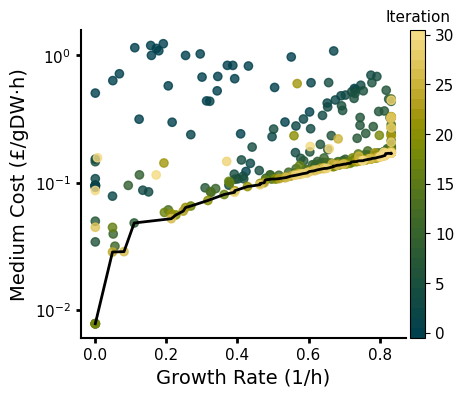

In [ ]:
# Read in the data
data = pd.read_csv("../data/Figure1B.csv")

# Create the plot with given size
fig, axes = plt.subplots(1, 1, figsize = (5, 4))

# Define colour mapping - 1 for random initial points, 1 each per batch (n_iter)
n_start = data["n_start"][0]
n_batch = data["n_batch"][0]
n_candidates = data["n_candidates"][0]

 # Generate distinct colours
colours = cmaps.bamako.cut(0.05, "right")(np.linspace(0, 1, n_batch + 1))
# Create a custom colourmap for the colour bar
cmap = mcolors.ListedColormap(colours)

# Create an array to store colours for each data point
point_colours = np.zeros(len(data), dtype = object)

# Assign first n_start points the same colour
point_colours[:n_start] = [colours[0]] * n_start
# Assign different colours to each batch
for i in range(n_batch):
    start_idx = n_start + i * n_candidates
    end_idx = start_idx + n_candidates
    point_colours[start_idx:end_idx] = [colours[i + 1]] * (end_idx - start_idx) # Assign a new color per batch
    
# Set boundaries between each batch, from -0.5 to n_batch + 0.5
boundaries = np.arange(n_batch + 2) - 0.5
norm = mcolors.BoundaryNorm(boundaries, cmap.N)

# transform cost data from 10^{-3} £/gDW·h to £/gDW·h
data["cost"] = data["cost"] * 1e-3
# Scatter plot with custom colours, applying transparence (alpha = 0.8)
sc = axes.scatter(data["growth_rate"], data["cost"], c = point_colours, alpha = 0.8)
# Set y-axis to log scale
axes.set_yscale("log")


# Extract and sort Pareto points by growth rate
pareto_data = data[data["is_pareto"] == True].sort_values(by = "growth_rate")
# Plot as a single line connecting the points
axes.plot(
    pareto_data["growth_rate"],
    pareto_data["cost"],
    label = "Pareto Front",
    color = "black",
    linewidth = 2
)


# axes
axes.set_xlabel("Growth Rate (1/h)", fontsize = 14)
axes.set_ylabel("Medium Cost (£/gDW·h)", fontsize = 14)
axes.xaxis.set_tick_params(width = 2, labelsize = 11)
axes.yaxis.set_tick_params(width = 2, labelsize = 11)
axes.tick_params(which = "minor", size = 0) # turn off minor ticks at colour boundaries
axes.spines["top"].set_visible(False)
axes.spines["right"].set_visible(False)
axes.spines["bottom"].set_linewidth(1.5)
axes.spines["left"].set_linewidth(1.5)

# Add the color bar
tick_positions = np.arange(0, n_batch + 1, 5)
sm = cm.ScalarMappable(cmap = cmap, norm = norm)
cbar = fig.colorbar(sm, ax = axes, ticks = tick_positions, pad = 0.01) # pad defines distance
cbar.ax.set_title("Iteration", fontsize = 11)
cbar.ax.tick_params(which = "minor", size = 0) # turn off minor ticks at colour boundaries
cbar.ax.tick_params(which = "major", labelsize = 11) # turn off minor ticks at colour boundaries

# Display the legend
# axes.legend()
    
# Show the plot
plt.show()

# fig.set_size_inches(9, 7)  # Consistent physical size in inches
fig.savefig("../figs/Figure1B.png", dpi = 300, bbox_inches = None)